**Erfan Panjehshahi - 402243046**

# Problem 1:

In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Generate time vector (x axis)
T = 1  # Signal duration in seconds
t = np.linspace(0, T, 10000, endpoint=False)  # High sampling to simulate CT signal
t_for_step = np.linspace(-1, T, 5000, endpoint=False)  # High sampling to simulate CT signal

**Let ω=2πf (transform angular frequency to linear)**

In [83]:
# Problem properties
frequencies = [5, 50, 120]  # in Hz
amplitudes = [1.0, 0.5, 0.2]

# Signals
sine_signals = [A * np.sin(2 * np.pi * f * t) for A, f in zip(amplitudes, frequencies)]
cosine_signals = [A * np.cos(2 * np.pi * f * t) for A, f in zip(amplitudes, frequencies)]
step_signal = [A * np.heaviside(t_for_step, 1.0) for A in amplitudes]

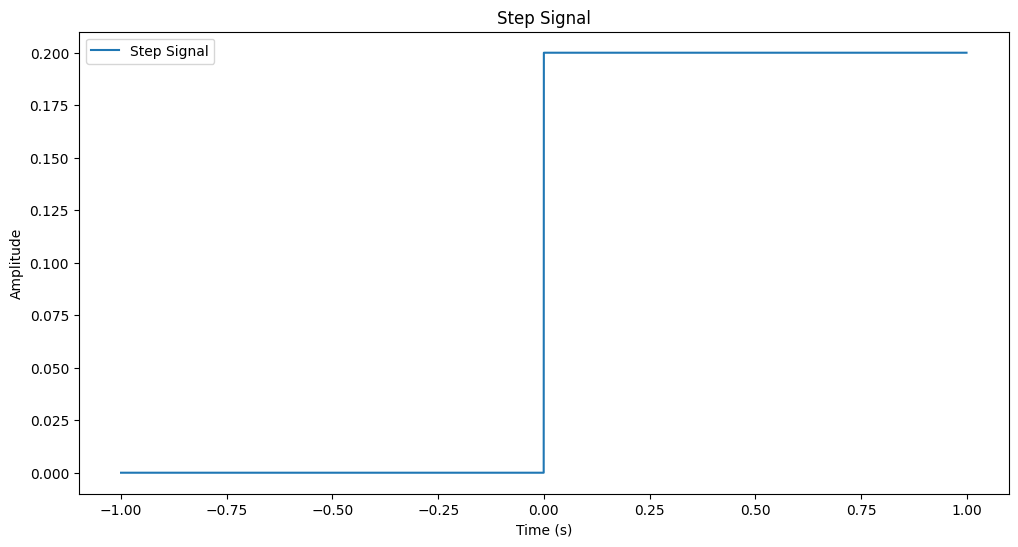

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(t_for_step, step_signal[2], label='Step Signal')
plt.title("Step Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

**Fourier Transform functions:**

In [85]:
def ft(signal, time, freq):
    dt = time[1] - time[0]
    ft = []
    for f in freq:
        integral = np.sum(signal * np.exp(-1j * 2 * np.pi * f * time)) * dt
        ft.append(integral)
    return np.array(ft)

def ift(ft, freq, time):
    df = freq[1] - freq[0]
    signal = []
    for t_val in time:
        integral = np.sum(ft * np.exp(1j * 2 * np.pi * freq * t_val)) * df
        signal.append(integral.real)
    return np.array(signal)

In [86]:
# Frequency vector for Fourier Transform
frequencies_ft = np.linspace(-500, 500, 10000)

**Sine signals:**

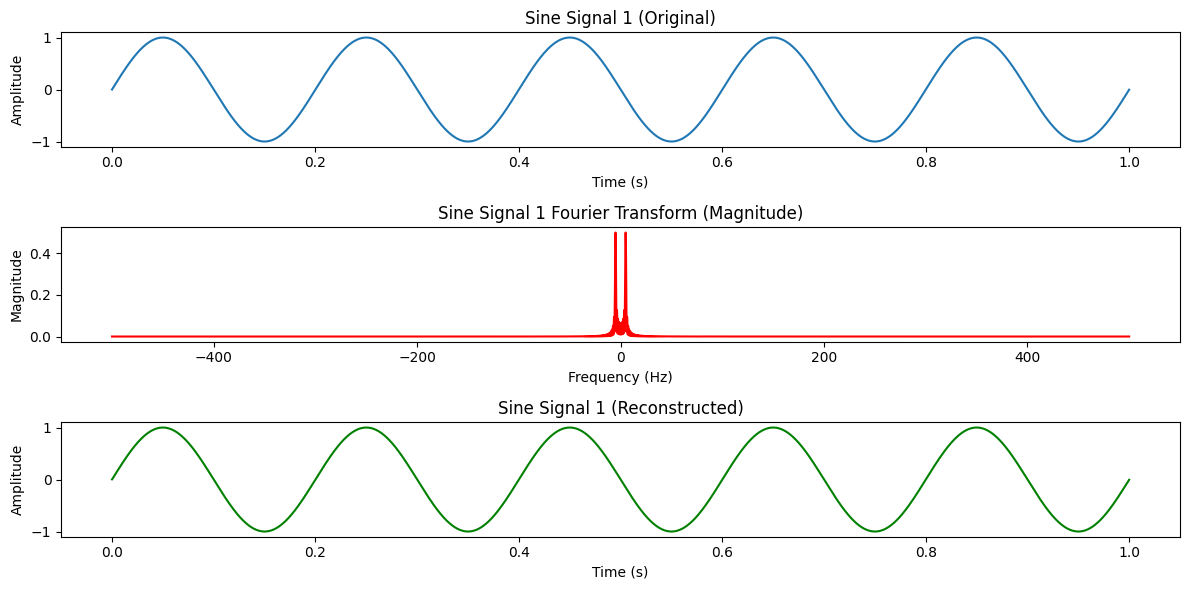

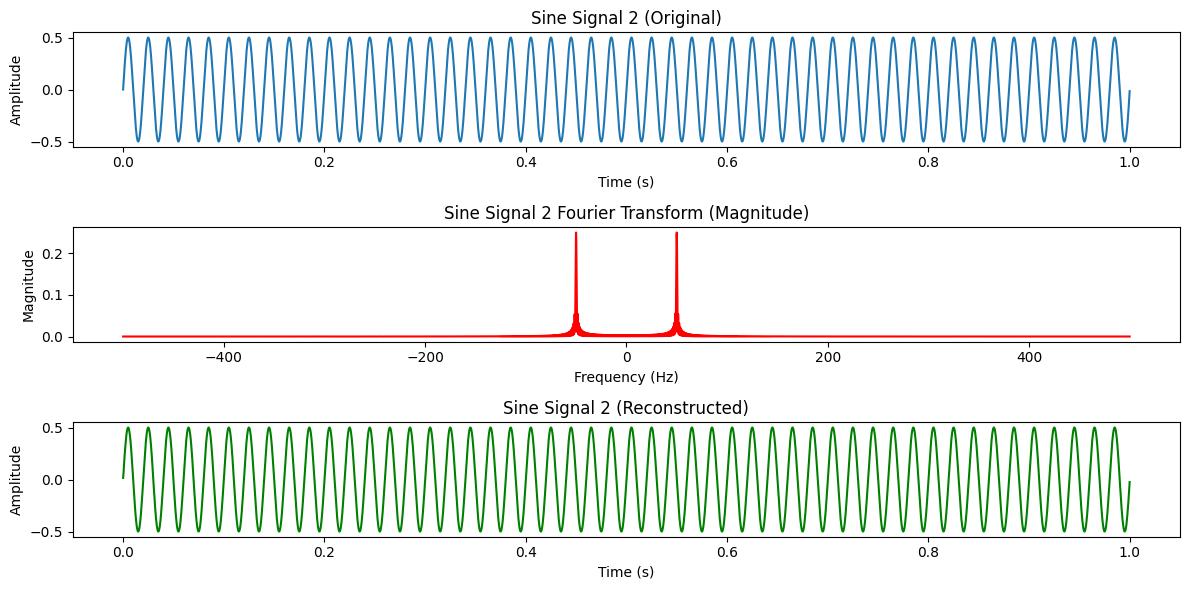

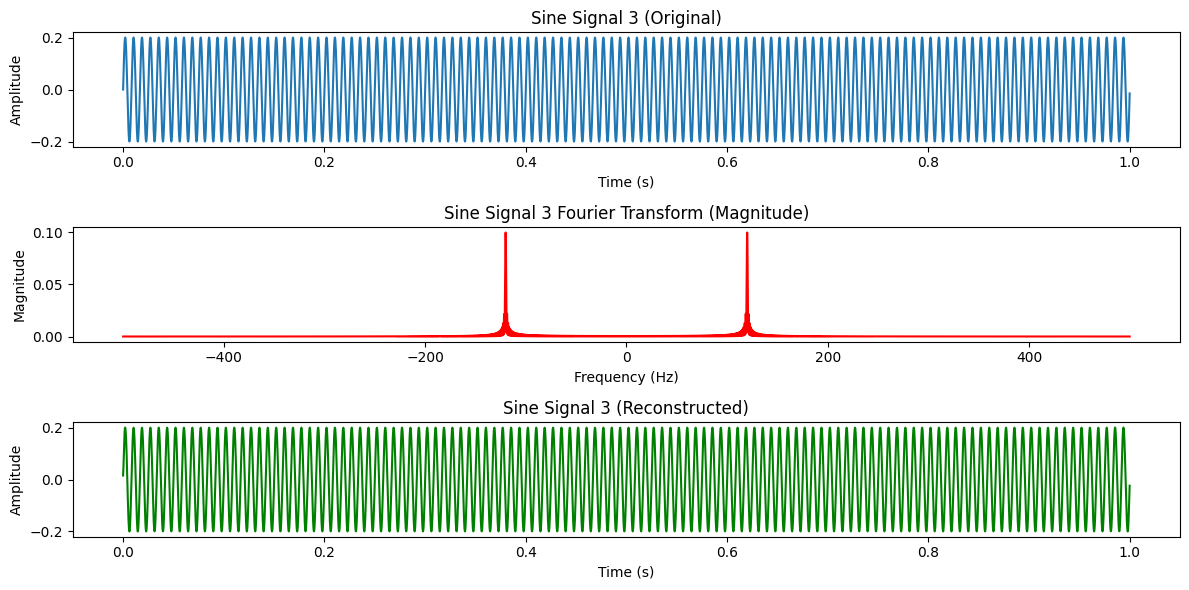

In [87]:
for i, signal in enumerate(sine_signals):
    # Fourier Transform
    ft_signal = ft(signal, t, frequencies_ft)

    # Inverse Fourier Transform
    reconstructed_signal = ift(ft_signal, frequencies_ft, t)

    # Plot original signal, FT magnitude, and reconstructed signal
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f"Sine Signal {i+1} (Original)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.plot(frequencies_ft, np.abs(ft_signal), color='red')
    plt.title(f"Sine Signal {i+1} Fourier Transform (Magnitude)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.subplot(3, 1, 3)
    plt.plot(t, reconstructed_signal, color='green')
    plt.title(f"Sine Signal {i+1} (Reconstructed)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

**Cosine signals:**

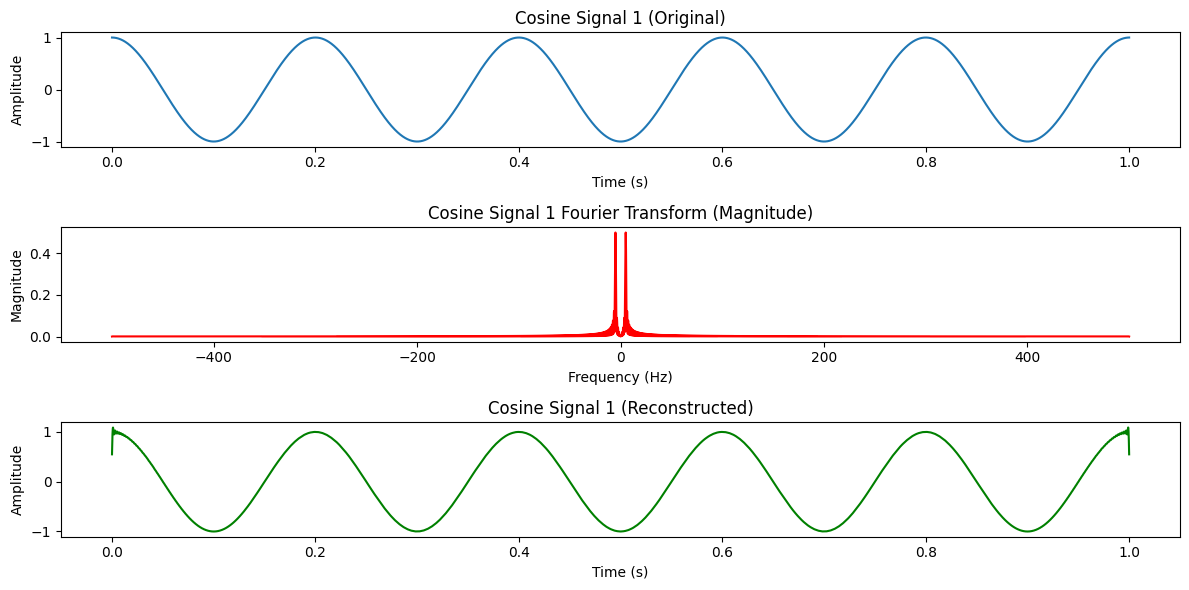

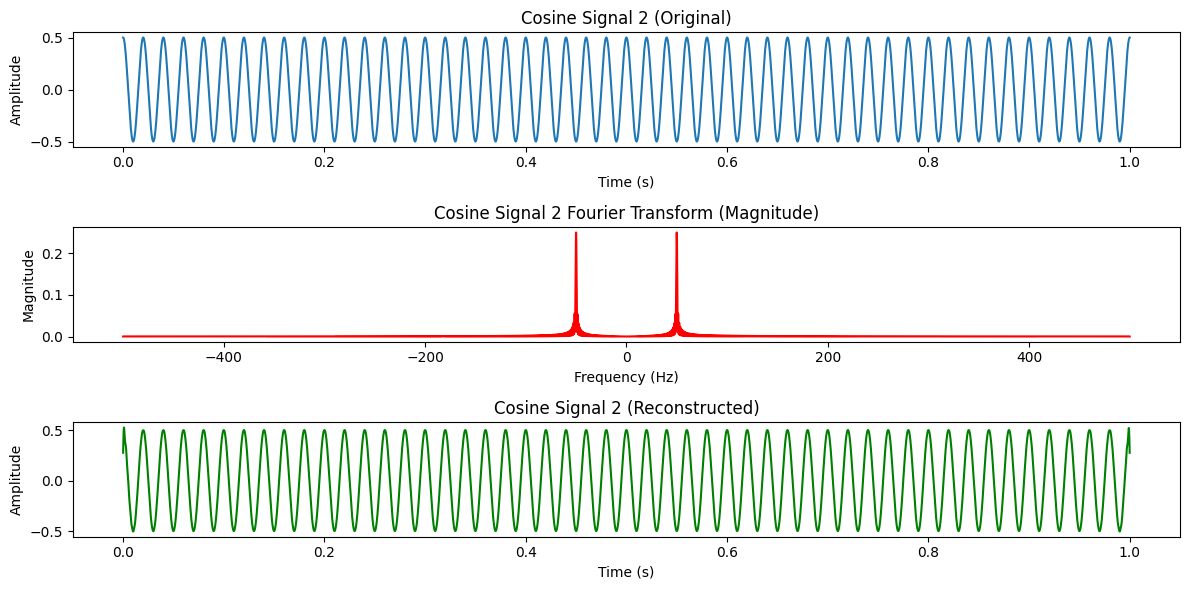

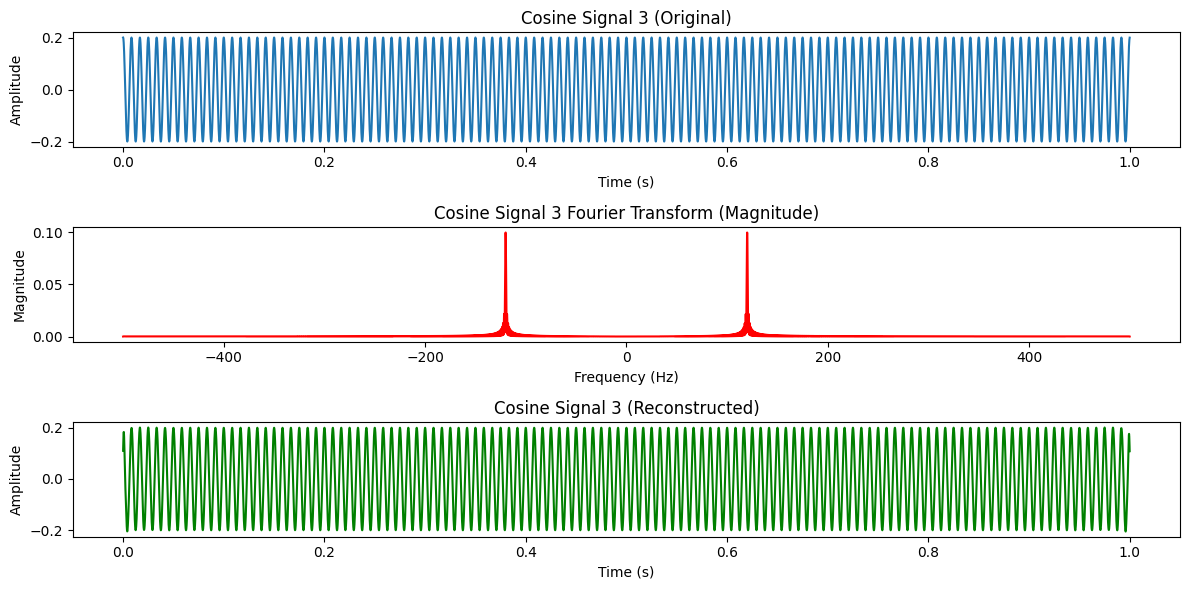

In [88]:
for i, signal in enumerate(cosine_signals):
    # Fourier Transform
    ft_signal = ft(signal, t, frequencies_ft)

    # Inverse Fourier Transform
    reconstructed_signal = ift(ft_signal, frequencies_ft, t)

    # Plot original signal, FT magnitude, and reconstructed signal
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(t, signal)
    plt.title(f"Cosine Signal {i+1} (Original)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.plot(frequencies_ft, np.abs(ft_signal), color='red')
    plt.title(f"Cosine Signal {i+1} Fourier Transform (Magnitude)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.subplot(3, 1, 3)
    plt.plot(t, reconstructed_signal, color='green')
    plt.title(f"Cosine Signal {i+1} (Reconstructed)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()


**Step signal**

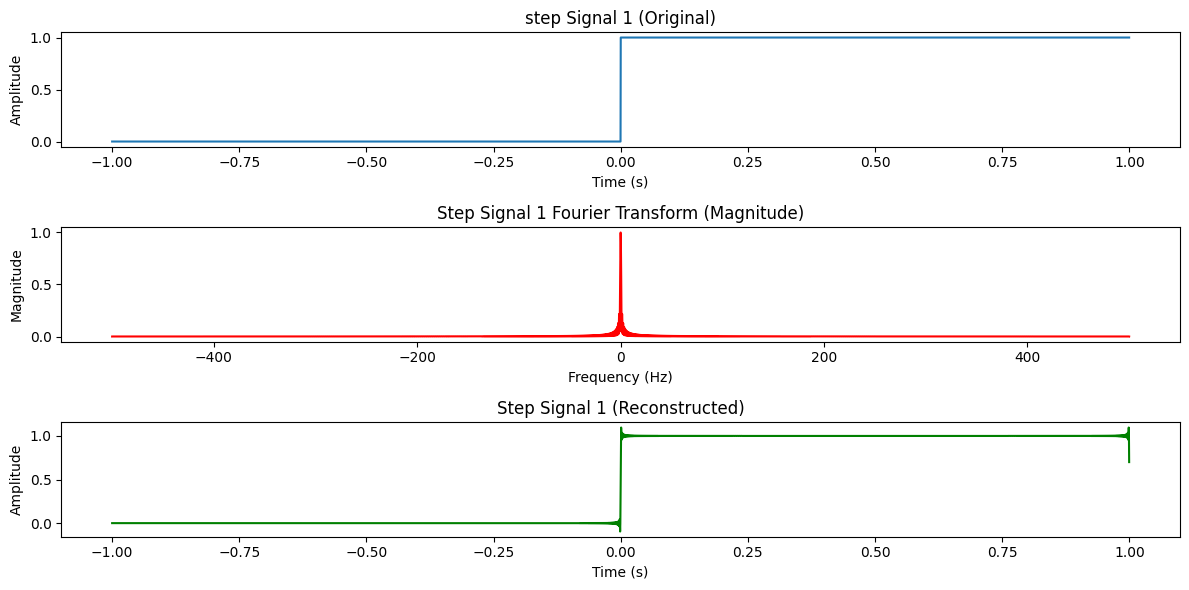

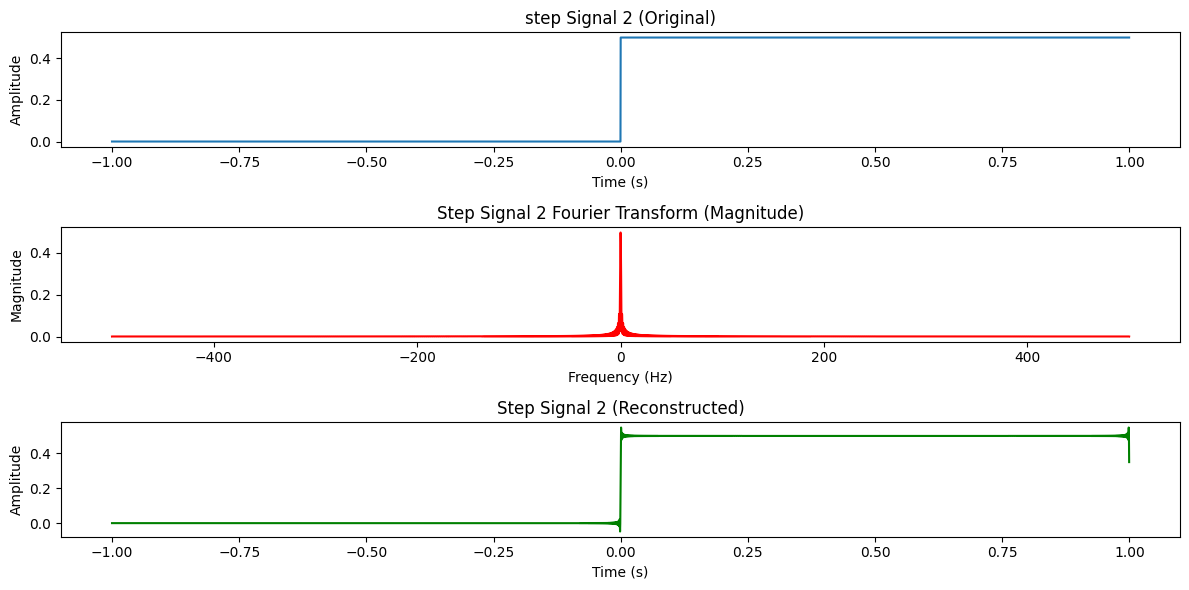

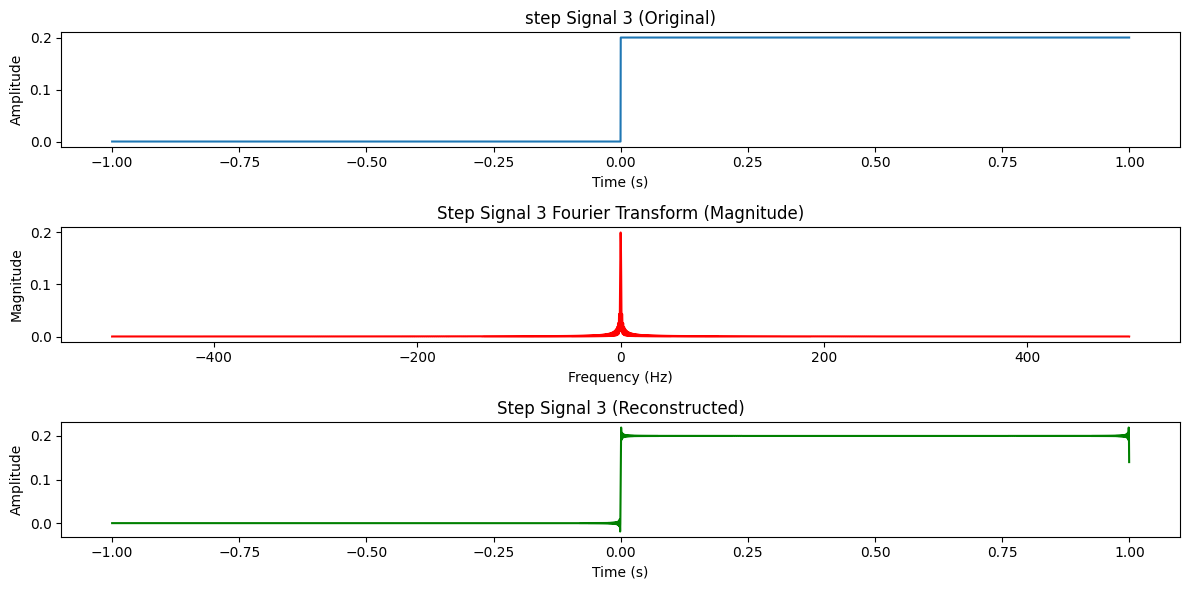

In [106]:
for i, signal in enumerate(step_signal):
    # Fourier Transform
    ft_signal = ft(signal, t_for_step, frequencies_ft)

    # Inverse Fourier Transform
    reconstructed_signal = ift(ft_signal, frequencies_ft, t_for_step)

    # Plot original signal, FT magnitude, and reconstructed signal
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(t_for_step, signal)
    plt.title(f"step Signal {i+1} (Original)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.plot(frequencies_ft, np.abs(ft_signal), color='red')
    plt.title(f"Step Signal {i+1} Fourier Transform (Magnitude)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")

    plt.subplot(3, 1, 3)
    plt.plot(t_for_step, reconstructed_signal, color='green')
    plt.title(f"Step Signal {i+1} (Reconstructed)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()


# Problem 2:

In [90]:
# Define signal
x_t = 50 * np.exp(1j * 2 * np.pi * 100 * t)

# Define noise
noise = np.random.normal(0, 10, len(t))

# Add noise to signal
x_t_noisy = x_t + noise

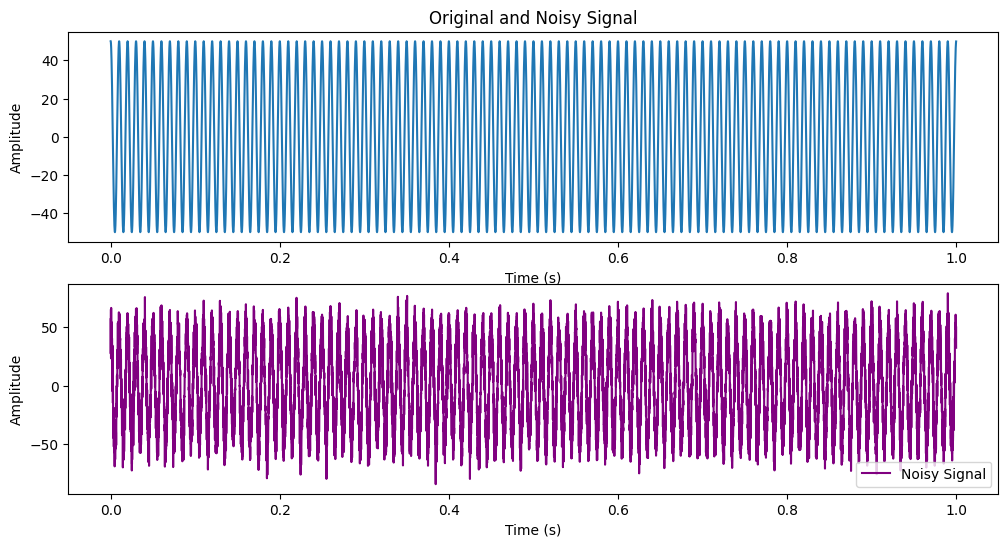

In [91]:
# Compare original and noisy signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x_t, label='Original Signal')
plt.title("Original and Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.subplot(2, 1, 2)
plt.plot(t, x_t_noisy, label='Noisy Signal', color='purple')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.legend()
plt.show()

In [92]:
# Create filters
# Low pass filter (inputs are signals in frequency not in time)
def low_pass_filter(ft_signal):
    # Limit domain (in this problem it's frequency set) and cutoff frequency = 20
    ft_signal[np.abs(frequencies_ft) > 20] = 0
    return ft_signal

# High pass filter
def high_pass_filter(ft_signal):
    # Limit domain (here, frequency set) and cutoff frequency = 50
    ft_signal[np.abs(frequencies_ft) < 50] = 0
    return ft_signal

# Band pass filter
def band_pass_filter(ft_signal):
  # Limit domain (here, frequency set). Low cutoff = 50 and high cutoff = 100
  ft_signal[np.logical_or(np.abs(frequencies_ft) < 50, np.abs(frequencies_ft) > 100)] = 0
  return ft_signal



از آنجایی که فیلترها سیگنال‌هایی در حوزه فرکانس را ورودی میگیرند، ابتدا تبدیل فوریه را بر سیگنال نویزی اعمال میکنیم. در ادامه فیلتر را بر روی حاصل تبدیل فوریه سیگنال نویزی اعمال مکنیم، پس از آن بر روی سیگنال نویزی در حوزه فرکانس که فیلتر شده است معکوس تبدیل فوریه را اعمال میکنیم تا خواسته سوال به دست آید.

**Low pass filter:**

**Step one: apply ft to noisy signal**

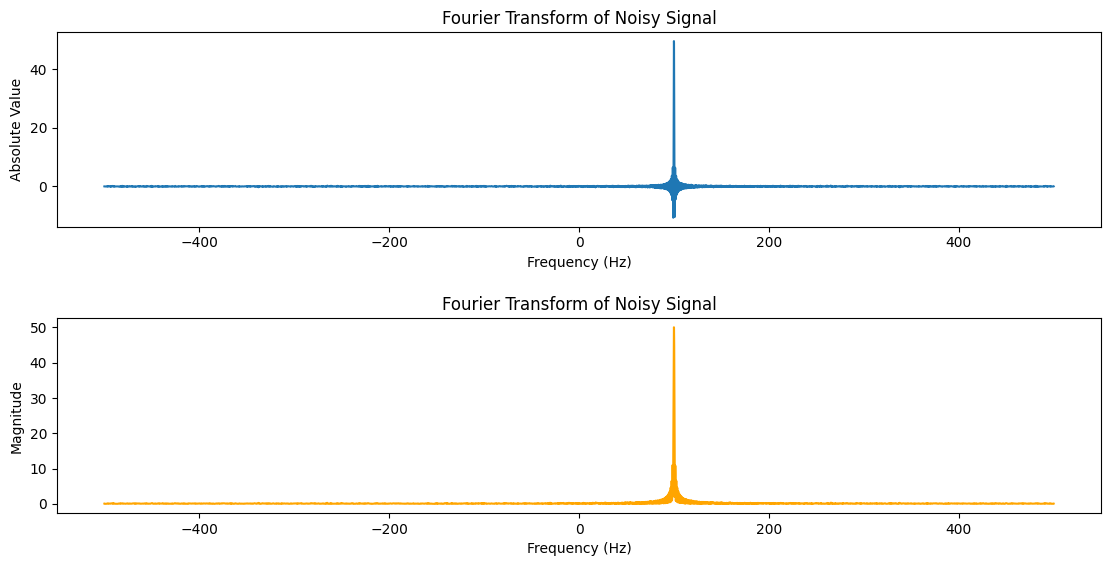

In [93]:
noisy_ft = ft(x_t_noisy, t, frequencies_ft)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies_ft, noisy_ft)
plt.title("Fourier Transform of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Absolute Value")
plt.tight_layout(pad=3.5)
plt.subplot(2, 1, 2)
plt.plot(frequencies_ft, np.abs(noisy_ft), color='orange')
plt.title("Fourier Transform of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

**Step two: Apply low pass filter on ft noisy signal**

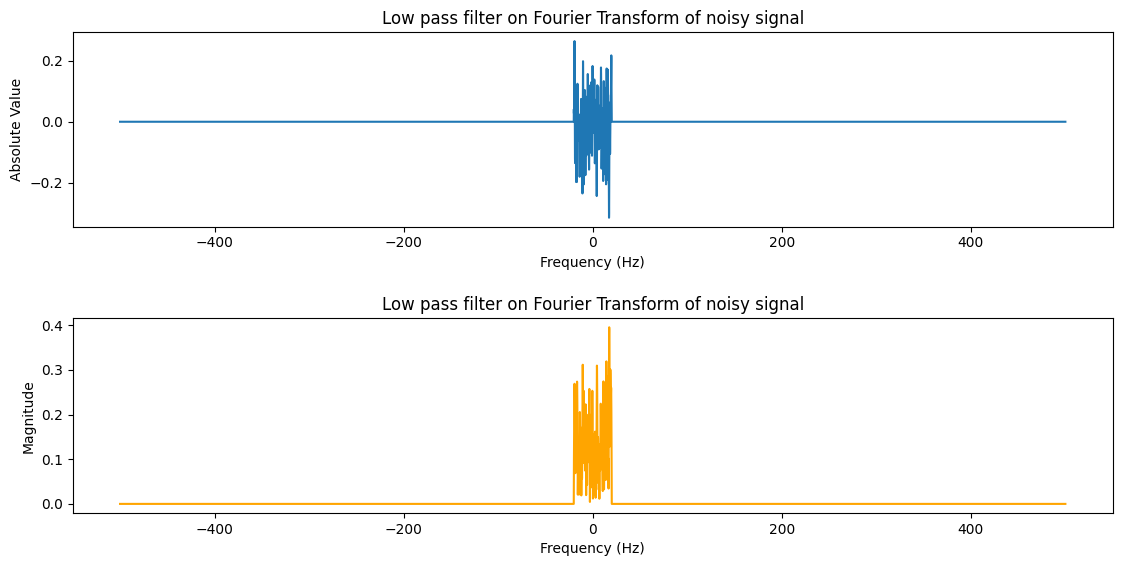

In [94]:
lp_ft_noisy_signal = low_pass_filter(noisy_ft)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(frequencies_ft, lp_ft_noisy_signal)
plt.title("Low pass filter on Fourier Transform of noisy signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Absolute Value")
plt.tight_layout(pad=3.5)
plt.subplot(2,1,2)
plt.plot(frequencies_ft, np.abs(lp_ft_noisy_signal), color='orange')
plt.title("Low pass filter on Fourier Transform of noisy signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

**Step three: Use ift on result of low pass filter**

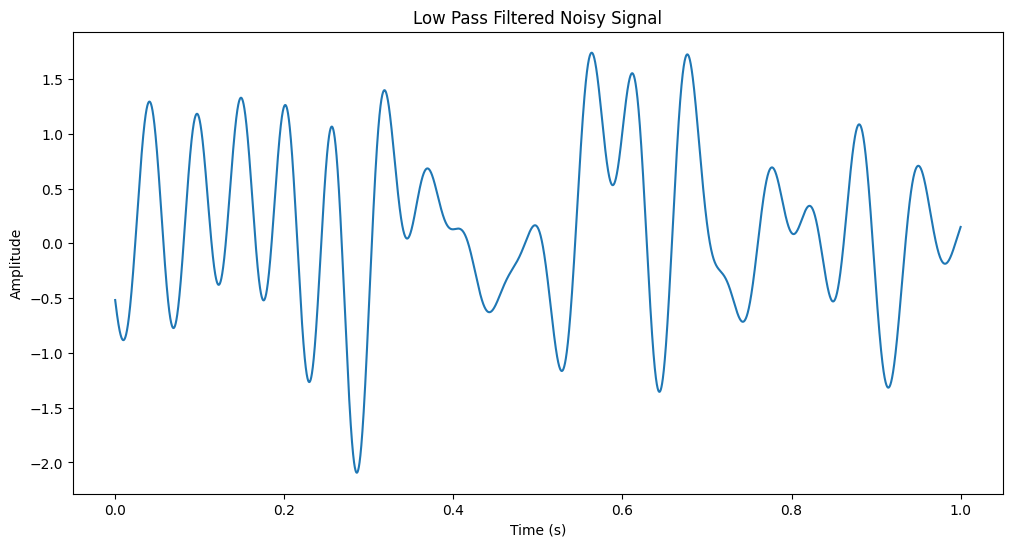

In [95]:
# Apply ift
lp_filtered_signal = ift(lp_ft_noisy_signal, frequencies_ft, t)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.plot(t, lp_filtered_signal)
plt.title("Low Pass Filtered Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

**High pass filter:**

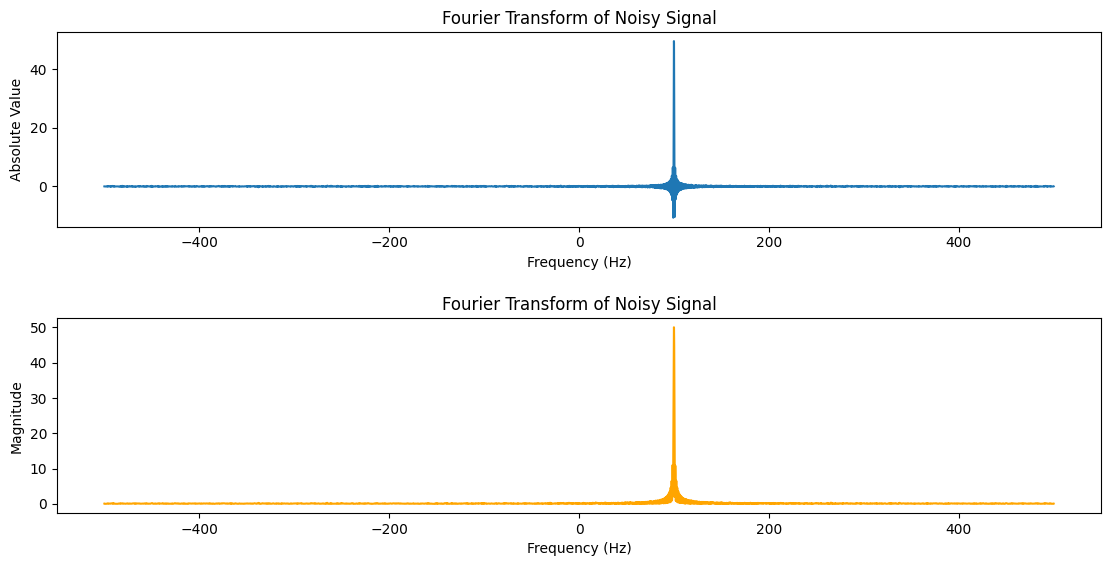

In [96]:
noisy_ft = ft(x_t_noisy, t, frequencies_ft)

# Plot noisy fr result
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies_ft, noisy_ft)
plt.title("Fourier Transform of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Absolute Value")
plt.tight_layout(pad=3.5)
plt.subplot(2, 1, 2)
plt.plot(frequencies_ft, np.abs(noisy_ft), color='orange')
plt.title("Fourier Transform of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

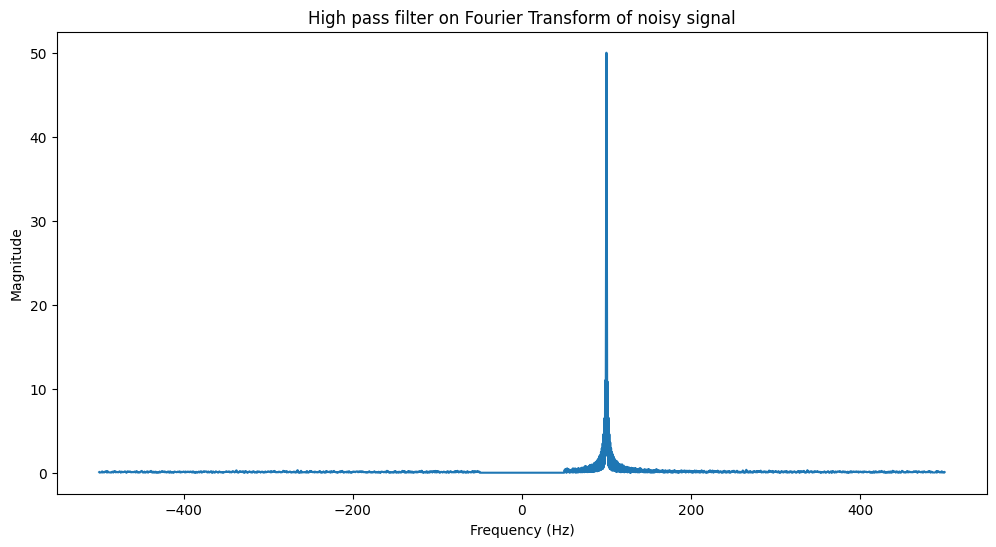

In [99]:
hp_ft_noisy_signal = high_pass_filter(noisy_ft)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.plot(frequencies_ft, np.abs(hp_ft_noisy_signal))
plt.title("High pass filter on Fourier Transform of noisy signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

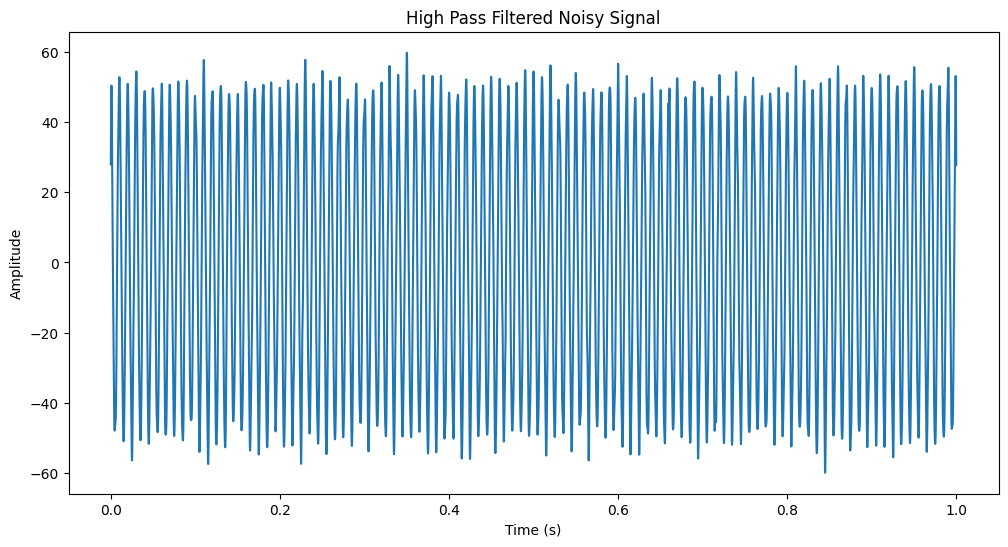

In [100]:
# Apply ift
hp_filtered_signal = ift(hp_ft_noisy_signal, frequencies_ft, t)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.plot(t, hp_filtered_signal)
plt.title("High Pass Filtered Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

**Band pass filter:**

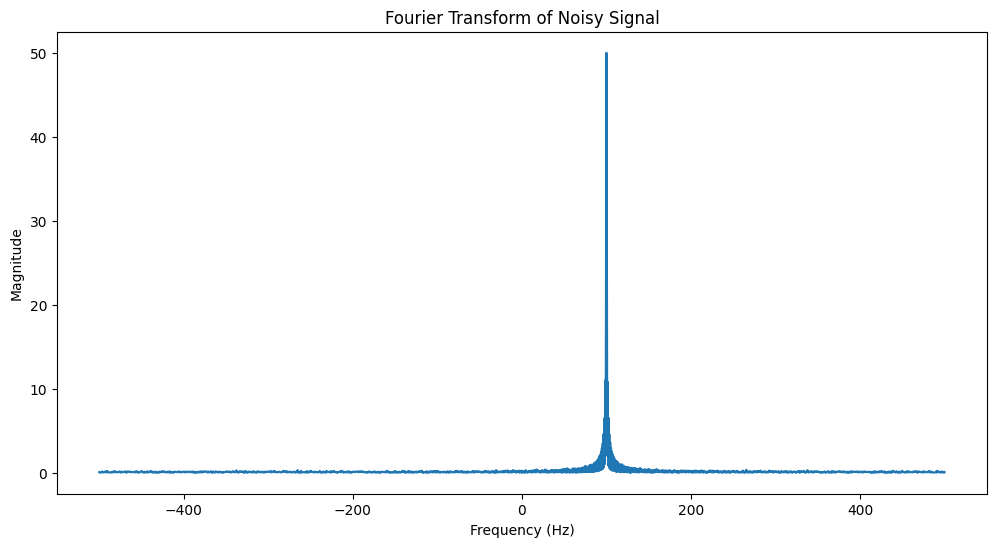

In [101]:
noisy_ft = ft(x_t_noisy, t, frequencies_ft)

# Plot noisy fr result
plt.figure(figsize=(12, 6))
plt.plot(frequencies_ft, np.abs(noisy_ft))
plt.title("Fourier Transform of Noisy Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

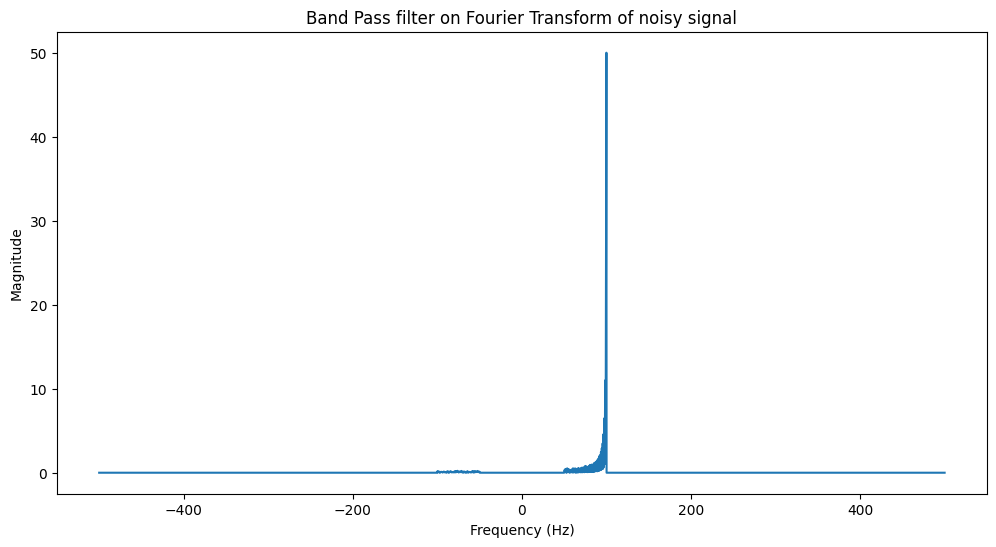

In [103]:
bp_ft_noisy_signal = band_pass_filter(noisy_ft)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.plot(frequencies_ft, np.abs(bp_ft_noisy_signal))
plt.title("Band Pass filter on Fourier Transform of noisy signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

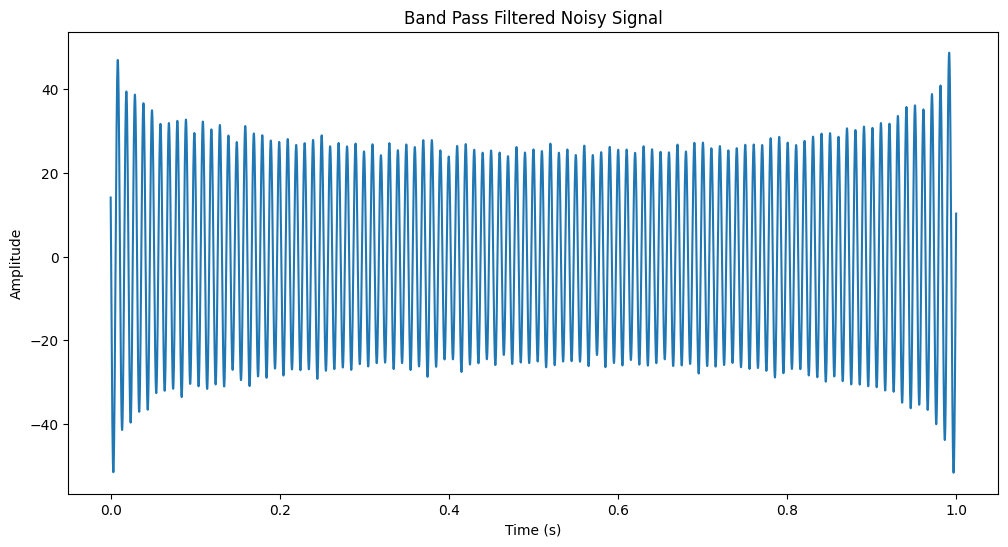

In [104]:
# Apply ift
bp_filtered_signal = ift(bp_ft_noisy_signal, frequencies_ft, t)

# Plot noisy ft result
plt.figure(figsize=(12, 6))
plt.plot(t, bp_filtered_signal)
plt.title("Band Pass Filtered Noisy Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

نتایج حاصل از اعمال فیلتر های گوناگون روی سیگنالی که نویز بر آن اعمال شده است:
اگر روی سیگنالی که تبدیل فوریه آن دارای شیب زیاد در یک ناحیه است، مثلا ناحیه حدود ۷۰ تا ۱۳۰ هرتز در مثال ما، فیلتری اعمال کنیم که بتواند فرکانس های این ناحیه با شیب زیاد، یعنی فرکانس هایی با اثر گذاری زیاد را حذف کند، سیگنال حاصل از اعمال وارون تبدیل فوریه بر نتیجه فیلتر، نویز بسیار کمتری خواهد داشت که و منحنی ها نرم‌تر می‌شوند.

برعکس تحلیل بالا، اگر فیلتری اعمال کنیم که فرکانس‌های کم اثر را حدف کند، مثل فیلتر بالاگذر در این مسئله، با اعمال وارون تبدیل فوریه، سیگنالی حاصل میشود که همچنان شباهت زیادی به سیگنال نویزی اولیه دارد، چرا که صرفا فرکانسهایی با اثرگذاری کم را حذف کرده‌ایم.

# Problem 3

**Part a:**

در اسپکتروگرام یک سیگنال، محور افقی زمان و محور عمودی محدوده فرکانس های موجود در سیگنال را نمایش میدهد.دامنه یا شدت را با رنگ نمایش میدهیم که نشان دهنده قدرت و اثرگذاری هر فرکانس در هر زمان از محدوده مورد بررسی است. پس به طور کلی رنگ‌ها در اسپکتروگرام نشان دهنده تاثیر فرکانس‌ها هستند. در ادامه نحوه ایجاد اسپکتروگرام یک سیگنال را خواهیم دید.

**Part b:**

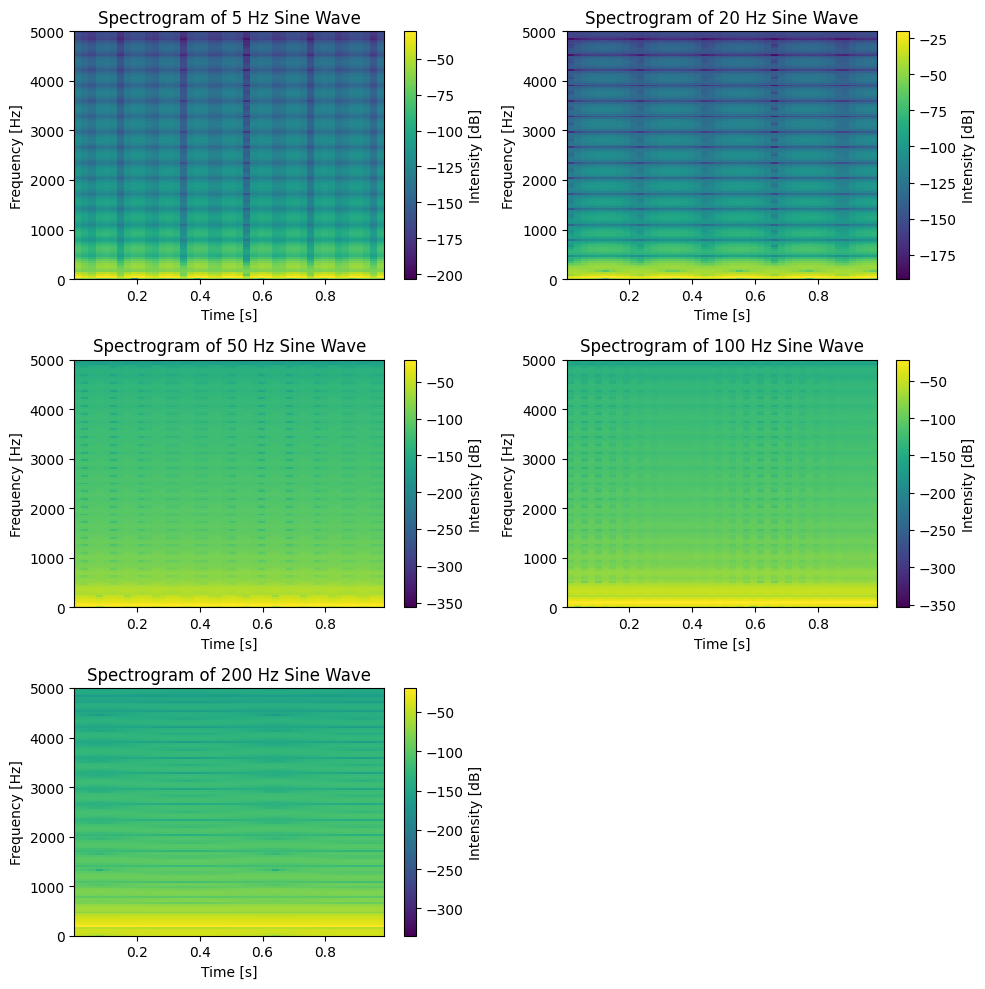

In [107]:
from scipy.signal import spectrogram

fs = 10000  # Sampling frequency (Hz)
duration = 1  # Duration of the signal in seconds
frequencies = [5, 20, 50, 100, 200]  # Frequencies of sine waves (Hz)

# Time
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

plt.figure(figsize=(10, 10))

for i, freq in enumerate(frequencies):
    signal = np.sin(2 * np.pi * freq * t)

    f, t_spec, Sxx = spectrogram(signal, fs)

    plt.subplot(3, 2, i+1)
    plt.pcolormesh(t_spec, f, 10 * np.log10(Sxx), shading='auto')
    plt.title(f'Spectrogram of {freq} Hz Sine Wave')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 5000)  # Set y-axis limit for better visibility

plt.tight_layout()
plt.show()

اسپکتروگرام به نوعی به صورت همزمان سیگنال را در حوزه زمان و فرکانس بررسی میکند، از شکل‌های بالا میتوان دریافت که هر چه فرکانس سیگنال سینوسی بالاتر میرود، شدت اثرگذاری فرکانس‌های بالاتر هم بیشتر است. مثلا در شکل مربوط به سیگنال ۲۰۰ هرتزی در مقایسه با سیگنال ۵ هرتزی به وضوح رنگ بنفش کمتری وجود دارد. با مقایسه این اسپکتروگرام‌ها با نتایج مسئله ۱ هم می‌توان به نتایج مشابه رسید.